# Advertising Sales Channel Prediction

### Problem Statement:

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel. 

# Importing Libraries:

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset:

In [133]:
# Reading the csv file from dataset
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5



From the dataset we can notice there are 5 columns which contains both features and one target variable. Here "sales" is the target variable which contains continuous data so it is a regression type problem.

So in order to improve the sales, we are advertising on the mentioned features.



In [134]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)

In [135]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


This is the dataframe after removing the column Unnamed:0 and showing the first five rows of the dataset

# EDA

In [136]:
# Checking the dimension of the dataset
df.shape

(200, 4)

In [137]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [138]:
# Checking the types of the dataset
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

# Checking null values:

In [139]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

#### Using heatmap:

<AxesSubplot:>

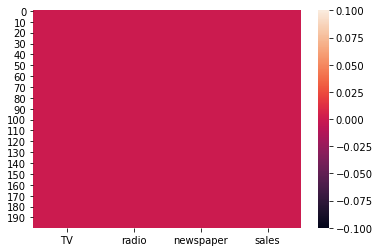

In [140]:
sns.heatmap(df.isnull())

#### There is no missing values in this dataset

In [141]:
# Checking the uniqueness of target variable
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

These are the unique values present in the target variable.

In [142]:
# List of values in the target variable
df["sales"].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: sales, Length: 121, dtype: int64

This gives the list of values in the target variable which has int64 data type.

In [143]:
# Checking whether the dataset contains any space
df.loc[df['sales']==" "]

,TV,radio,newspaper,sales


So from the above observation we can say there are no spaces present in the dataset.

# Description of Dataset

In [144]:
# Statistical summary of dataset
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


All numerical data.

The mean value of TV is 147 which means this platform has good sales. 
no null values 

outliers and skewness present

# Visualization of Dataset:

In [145]:
# Checking number of unique values in all the columns and plotting pie-chart
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

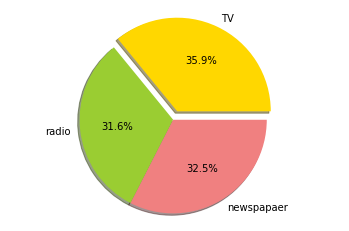

In [146]:
labels = 'TV','radio','newspapaer'
sizes = [190,167,172]
colors = ['gold','yellowgreen','lightcoral']
explode = (0.1,0,0)

#plot
plt.pie(sizes,labels=labels,explode=explode,colors = colors,
        autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.show()

This pie chart visualizes the volume of the feature columns

### Univariate Analysis

<AxesSubplot:xlabel='TV', ylabel='Density'>

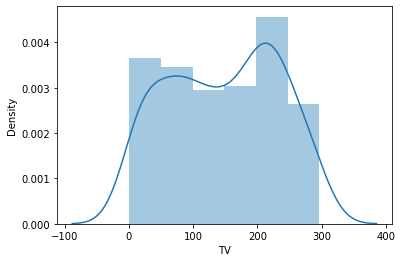

In [147]:
# Checking how the data is distributed in the column TV
sns.distplot(df["TV"])

The data is almost normally distributed and has skewness too.

<AxesSubplot:xlabel='radio', ylabel='Density'>

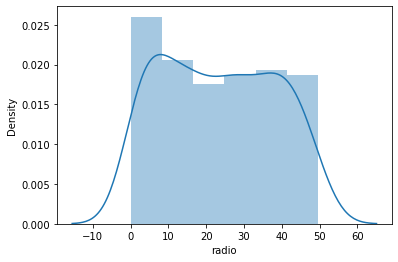

In [148]:
# Checking how the data is distributed in the column radio
sns.distplot(df["radio"])

The data is almost normally distributed.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

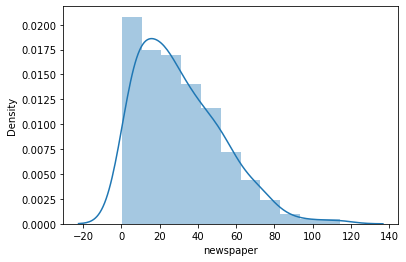

In [149]:
# Checking how the data is distributed in the column newspaper
sns.distplot(df["newspaper"])

Here the data in the newpaper feature contains left skewness.

<AxesSubplot:xlabel='sales', ylabel='Density'>

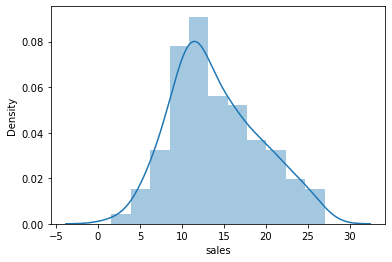

In [150]:
# Checking how the data is distributed in the target variable sales
sns.distplot(df["sales"])

Here the data in the newpaper feature contains left skewness.

The data is almost normally distributed.

some columns contains skewness.

### Bivariate Analysis

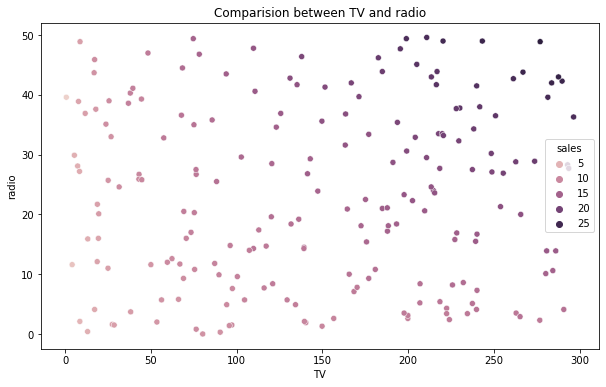

In [151]:
# Checking the relation between TV and radio on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between TV and radio')
sns.scatterplot(df['TV'],df['radio'],hue=df["sales"]);

Here we can see the data is scattered so there is no linear relationship while comparing TV and radio. As we can see from the plot, if we spend 5 to 15 dollars(say) then we dont get any sales from both TV and radio .But if we spend more money than this then we can see the increment in the sales.

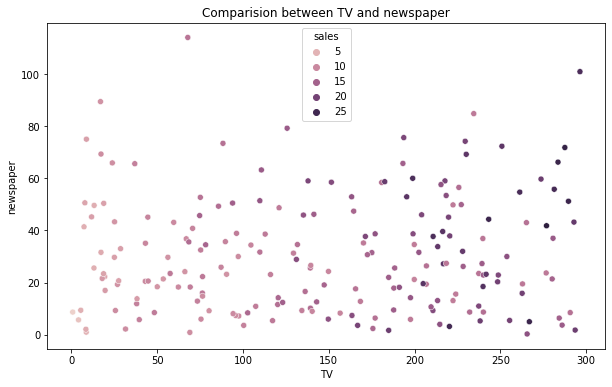

In [152]:
# Checking the relation between TV and newspaper on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between TV and newspaper')
sns.scatterplot(df['TV'],df['newspaper'],hue=df["sales"]);


Here we can see the data is scattered so there is no linear relationship while comparing TV and radio. As we can see from the plot, if we spend 5 to 15 dollars(say) then we dont get any sales from both TV and radio .But if we spend more money than this then we can see the increment in the sales.

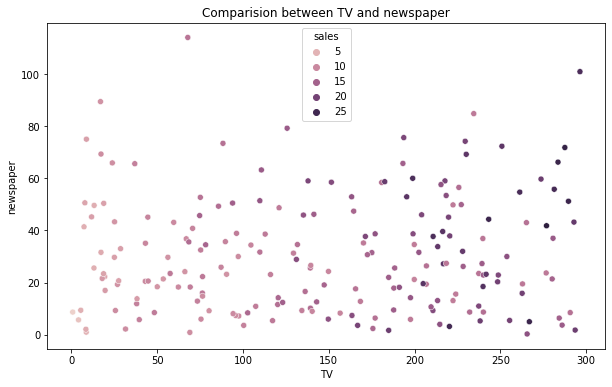

In [153]:
# Checking the relation between TV and newspaper on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between TV and newspaper')
sns.scatterplot(df['TV'],df['newspaper'],hue=df["sales"]);

By comparing TV and newpaper we can say there is no linearity between them and we can also notice less sales in newspaper channel and the sales increased as the money increases in the TV channel. Also investing more money increases the sales. There are some outliers present, we will identify them by box plot later.

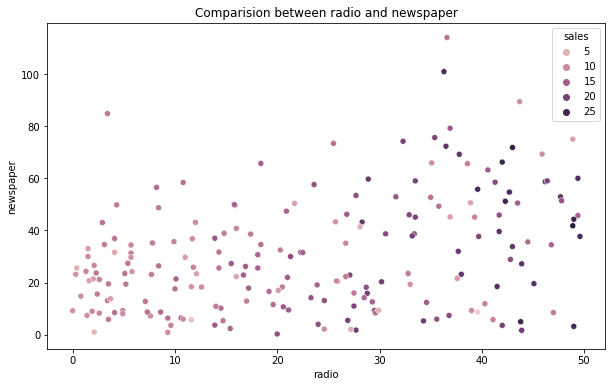

In [154]:

# Checking the relation between radio and newspaper on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between radio and newspaper')
sns.scatterplot(df['radio'],df['newspaper'],hue=df["sales"]);


This is the comparision between the radio and newspaper on the basis of sales. There is no linear relationship between these features. 

outliers present here.

if we invest more money then we get more sales in all the platforms.



<AxesSubplot:xlabel='newspaper', ylabel='sales'>

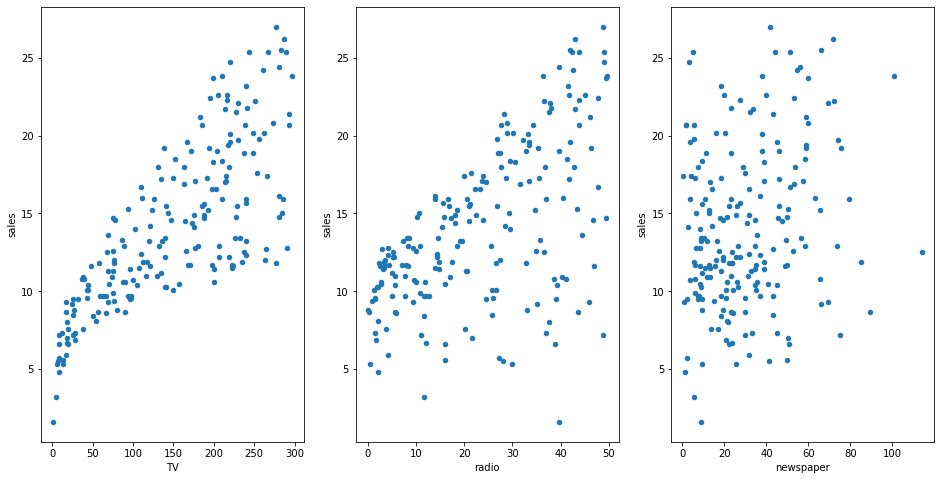

In [155]:
# Visualizing the relationship between the features and the label 
fig, axs = plt.subplots(1,3)

df.plot(x = "TV", y = "sales", kind = "scatter", ax=axs[0], figsize = (16,8))
df.plot(x = "radio", y = "sales", kind = "scatter", ax=axs[1])
df.plot(x = "newspaper", y = "sales", kind = "scatter", ax=axs[2])

From the above graphs, it can be observed that there seems to be a linear relationship between the features TV, Radio with the sales.

TV vs sales
We can notice the linear relation between TV and sales. This means if we increase our investment in advertising the product on TV then there is an improvemnt in our sales and getting upto 80% profit too. Which means there is a positive linear relationship.

Radio vs sales
Here also we can observe the linear relationship between radio and sales. This means if we invest in advertising the product on radio then also we can get a profit in our sales but not more as TV. And we can say we are getting 45%(say) profit. But there is no loss in advertising on radio.

Newspaper vs sales
In case of newspaper there is no relationship with sales which means advertising the product on newspaper will not improve our sales also we get more loss by investing money on newspaper. So we can say may be newspaper is not the best platform to invest the money. 

### Multivariate Analysis

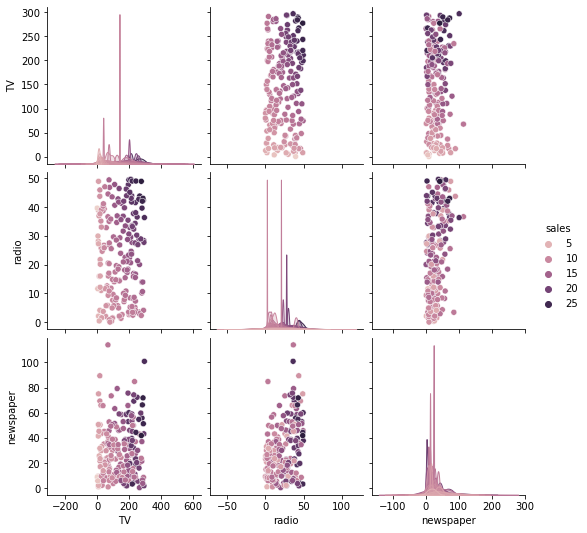

In [156]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="sales")

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'sales'.

From this pairplot we can observe that the correlation exists between two variables and on the diagonal we can see distribution plotting. As we can see the features TV and radio are highly correlated.

<AxesSubplot:xlabel='TV', ylabel='Count'>

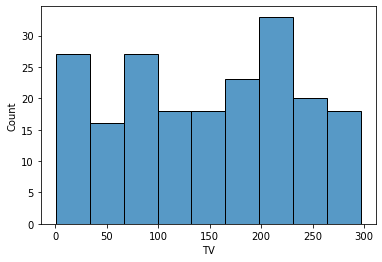

In [157]:
sns.histplot(df['TV'])

The histogram represents the distribution of "TV" column is uniform.

<AxesSubplot:xlabel='radio', ylabel='Count'>

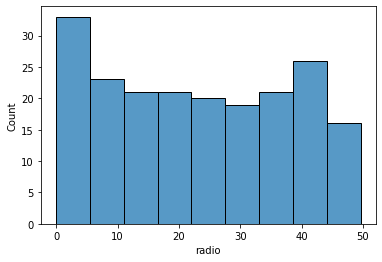

In [158]:
sns.histplot(df["radio"])

The histogram represents the distribution of "radio" column is uniform.

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

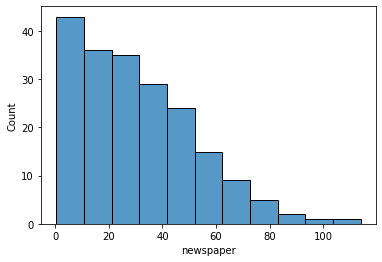

In [159]:
sns.histplot(df["newspaper"])

The histogram represents the distribution of "newspaper" is ununiform, it is skewed positively.

## Correlation between the target variable and independent variables using HEAT map

In [160]:
cor = df.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map

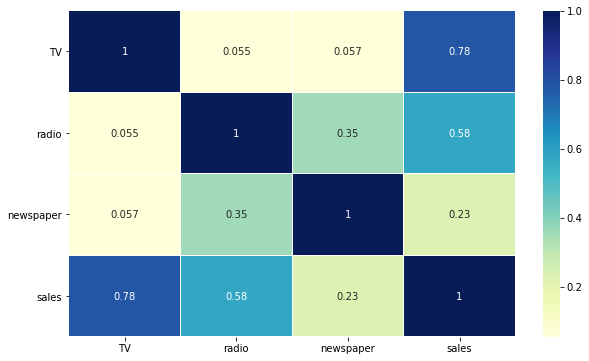

In [161]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu",annot = True)
plt.yticks(rotation=0);


The heat map contains only positive correlation.

We can observe the target variable sales are highly correlated with TV.
sales are moderately correlated with radio.
sales are less correlated with newspaper.
There is a less correlation between TV and newspaper also TV and radio.
We can also see there is no high correlation between feature to feature which means there is no multicollinearity problem.

In [162]:
cor['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

## Visualizing the correlation between label and features using bar plot

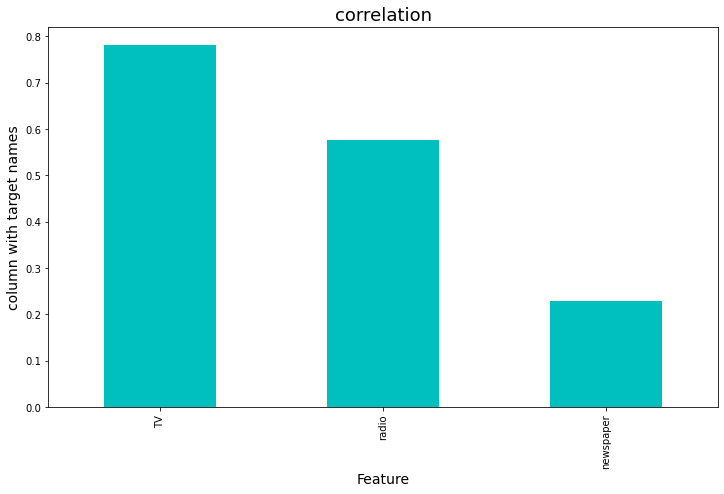

In [163]:
plt.figure(figsize=(12,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Here we can easily observe the correlation as sales are highly correlated with TV, moderately correlated with radio and less correlated with newspaper.

# Identifying the outliers

<AxesSubplot:>

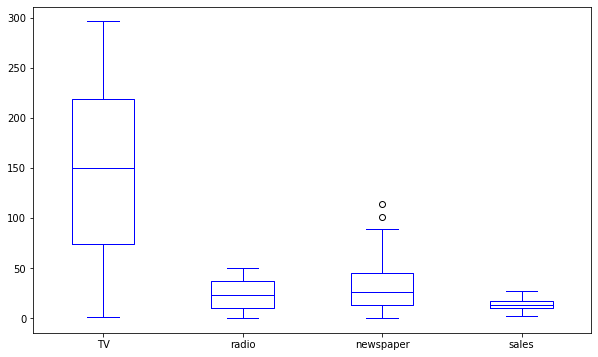

In [164]:
df.plot(kind="box", figsize = (10,6), color="b")

There are outliers present only in newpaper on the maximum side of the boxplot. Let's remove those outliers.

# Removing outliers

### 1. Zscore method

In [165]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [166]:
variables = df[["newspaper"]]

In [167]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(variables))

# Creating new dataframe
new_df=df[(z<3).all(axis=1)]
new_df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


This is the new dataframe after removing the outliers.

In [168]:
df.shape

(200, 4)

The original dataset contains 200 rows and 4 columns.

In [169]:
new_df.shape

(198, 4)

The new dataframe contains 198 rows and 4 columns.

In [170]:
# Let's check the the data loss
data_loss = (200-198)/200*100
data_loss

1.0


There is only 1% data loss. Here I am not losing more data so I am removing the outliers. Now let's checkthe dataloss using IQR method.

### 2. IQR (Inter Quantile Range) method

In [171]:
# 1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Now the outliers have been removed using IQR method

In [172]:
df.shape

(200, 4)

In [173]:
df1.shape

(198, 4)

The new dataframe after using IQR method has 198 rows and 4 columns.

In [194]:

# Let's check the the data loss
data_loss = (200-198)/200*100
data_loss

1.0


So here also we are getting 1% data loss using IQR method. We can use any of these methods so, let me consider Zscore method.

# Checking for skewness

In [195]:

# Checking the skewness
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

Skewness threshold is taken as +/- 0.65.


Only newspaper has skewness, let's remove the skewness.

### Removing Skewness using yeo-johnson method

In [196]:
feature = ["newspaper"]

In [197]:

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [198]:
new_df[feature] = scaler.fit_transform(new_df[feature].values)
new_df[feature]

,newspaper
0,1.648697
1,0.825748
2,1.651777
3,1.304941
4,1.301584
...,...
195,-0.701102
196,-1.137700
197,-1.296049
198,1.555234


In [199]:
# Now let's check the skewness after applying yeo-johnson method.
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.008290
sales        0.407130
dtype: float64


We can see the skewness has been removed. Now let's visualize it by using distplot.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

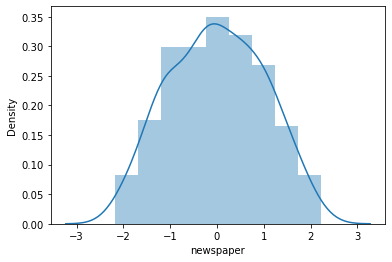

In [200]:
# After removing let's check how the data has been distributed in each column.

sns.distplot(new_df["newspaper"])

Now the feature newpaper looks normally distributed and has no skewness.

In [201]:
# cleaned dataset
new_df

,TV,radio,newspaper,sales
0,230.1,37.8,1.648697,22.1
1,44.5,39.3,0.825748,10.4
2,17.2,45.9,1.651777,9.3
3,151.5,41.3,1.304941,18.5
4,180.8,10.8,1.301584,12.9
...,...,...,...,...
195,38.2,3.7,-0.701102,7.6
196,94.2,4.9,-1.137700,9.7
197,177.0,9.3,-1.296049,12.8
198,283.6,42.0,1.555234,25.5


This is our cleaned dataset.

# Data preprocessing

### Separating the independent and target variables into x and y

In [202]:
x = new_df.drop("sales", axis=1)
y = new_df["sales"]

In [203]:
# dataset containing only features
x

,TV,radio,newspaper
0,230.1,37.8,1.648697
1,44.5,39.3,0.825748
2,17.2,45.9,1.651777
3,151.5,41.3,1.304941
4,180.8,10.8,1.301584
...,...,...,...
195,38.2,3.7,-0.701102
196,94.2,4.9,-1.137700
197,177.0,9.3,-1.296049
198,283.6,42.0,1.555234


## Scaling data with standard scaler

In [204]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,TV,radio,newspaper
0,0.978697,0.989521,1.648697
1,-1.199012,1.090705,0.825748
2,-1.519332,1.535913,1.651777
3,0.056456,1.225616,1.304941
4,0.400243,-0.831784,1.301584
...,...,...,...
193,-1.272932,-1.310720,-0.701102
194,-0.615864,-1.229773,-1.137700
195,0.355657,-0.932968,-1.296049
196,1.606431,1.272836,1.555234


This is our scaled data using standard scaler.

# Modeling

### Finding best random state

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [206]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_state ",maxRS)

Maximum r2 score is  0.9360012992981621 on Random_state  90


So, here getting the maximum r2 score as 93% on the random state 90.

In [207]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state = maxRS)

# Regression Algorithms

In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

## Linear Regression

In [209]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',metrics.r2_score(y_test,predLR))

R2_score: 0.9360012992981621


In [210]:
from sklearn import metrics
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predLR))

1.0276278017934888


In [211]:
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predLR))

1.575527835941264


In [212]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predLR)))

1.2552003170575061


## Random Forest Regressor

In [213]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predRFR))

R2_Score: 0.9712156796416012


The R2 score using Random Forest Regressor is 97%.

In [214]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predRFR))

0.6952499999999979


In [215]:
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predRFR))

0.7086159166666619


In [216]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

0.8417932743059081


## Decision Tree Regressor

In [217]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predDTR))

R2_Score: 0.965966805844475


The R2 score uisng Decision Tree Regressor is 96%

In [218]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predDTR))

0.735


In [219]:
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predDTR))

0.8378333333333329


In [220]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

0.9153323622233254


# KNN Regressor

In [221]:
# Checking R2 score for KNN regressor
knn=KNN()
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predknn))

R2_Score: 0.9269186069340969


The R2 score using KNN Regressor is 92%.

In [222]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predknn))

0.9190000000000003


In [223]:
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predknn))

1.7991266666666674


In [224]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predknn)))

1.3413152748950068


# Support Vector Regressor

In [225]:
# Checking R2 score for KNN regressor
svr=SVR()
svr.fit(x_train,y_train)

#prediction
predsvr=svr.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predsvr))

R2_Score: 0.9303570308378177


The R2 score using SVR is 93%

In [226]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predsvr))

0.8175581212813966


In [227]:
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predsvr))

1.7144791267530555


In [228]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

1.3093811999387557


# Stochastic Gradient Descent Regressor

In [229]:
# Checking R2 score for SGD Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

#prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predSGD))

R2_Score: 0.9350940774392231


The R2 score using SGD Regressor is 93%

In [230]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predSGD))

1.0399335890140409


In [231]:
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predSGD))

1.5978619345472949


In [232]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predSGD)))

1.264065636961663


## Checking the cross validation score

In [233]:
from sklearn.model_selection import cross_val_score

In [234]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean())

0.8857146539369369


In [235]:
# Checking cv score for Random Forest Regression
print(cross_val_score(RFR,x,y,cv=5).mean())

0.9754439497361224


In [236]:
# Checking cv score for Decision Tree Regression
print(cross_val_score(DTR,x,y,cv=5).mean())

0.9504004158057746


In [237]:
# Checking cv score for KNN Regression
print(cross_val_score(knn,x,y,cv=5).mean())

0.9365223923652131


In [238]:
# Checking cv score for SVR Regression
print(cross_val_score(svr,x,y,cv=5).mean())

0.9045398186509541


In [239]:
# Checking cv score for SGD Regression
print(cross_val_score(SGD,x,y,cv=5).mean())

0.8862182757148404



From the above observation, the difference between R2 score and the cross validation score we conclude that Random Forest Regressor is our best fitting model

# Hyper parameter tuning

In [240]:
from sklearn.model_selection import GridSearchCV

In [241]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,4,6]}

In [242]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [248]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [249]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

This gives the best parameter value.

In [250]:
Add_sales = RandomForestRegressor(criterion='mse', max_depth=6, max_features='auto', n_estimators=200)
Add_sales.fit(x_train, y_train)
pred = Add_sales.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.8417932743059081
R2_Score: 97.18167600056937


After tuning the model Random Forest Regressor, we are getting R2 score as 97% which is good.

# Saving the model

In [251]:
import joblib

joblib.dump(Add_sales,'Add_Sales_Channel.obj')

['Add_Sales_Channel.obj']

In [252]:
loadmodel = joblib.load('Add_Sales_Channel.obj')

# Conclusion

In [253]:
import numpy as np
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_com

,Original,Predicted
0,18.0,17.643667
1,5.6,6.311182
2,22.3,23.475215
3,19.6,19.622809
4,16.6,15.691116
5,22.2,21.274980
6,21.5,21.191434
7,13.2,12.671478
8,22.4,23.160801
9,8.8,8.472139
